<h3>Autoencoder</h3>
<br>Build and fit a convolutional autoencoder for the Fashion MNIST dataset.</br>
<br>The components of this network consisted of: Conv2D, MaxPooling, and so on.</br>
<br>The encoder part of the network should run the input image through a few
convolutional layers of your choice. The decoder part of the network will utilize
UpSampling2D to get the representation back to the original image size.<br>

In [21]:
from keras.datasets import mnist
from keras.models import Model
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, GlobalAveragePooling2D,Conv2DTranspose, MaxPooling2D, UpSampling2D,Conv1D,GlobalMaxPooling1D
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

<H3>Fashion MNIST Dataset</H3>
<ul>
<li>0 T-shirt/top</li>
<li>1 Trouser</li>
<li>2 Pullover</li>
<li>3 Dress</li>
<li>4 Coat</li>
<li>5 Sandal</li>
<li>6 Shirt</li>
<li>7 Sneaker</li>
<li>8 Bag</li>
<li>9 Ankle boot</li>
</ul>

The image is a: Pullover


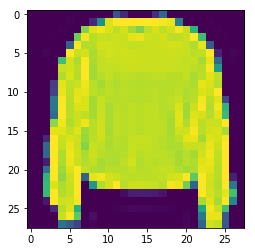

In [175]:
#Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

labelDic = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

#Visualize one sample
sample = 7
plt.imshow(x_train[sample])
print("The image is a:", labelDic[y_train[sample]])

In [7]:
# this is the size of our encoded representations
encoding_dim = 49  # 49 floats -> compression of input from 28*28 floats

# this is our input placeholder
input_img = Input(shape=(28,28,1))

# Encoder
# "encoded" is the encoded representation of the input
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)


# Decoder
# "decoded" is the lossy reconstruction of the input
x = Conv2D(8, (3, 3), activation='relu', padding='same', name = 'd1')(encoded)
x = UpSampling2D((2, 2), name = 'd2')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same', name = 'd3')(x)
x = UpSampling2D((2, 2), name = 'd4')(x)
x = Conv2D(16, (3, 3), activation='relu', name = 'd5')(x)
x = UpSampling2D((2, 2), name = 'd6')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 4, 4, 8)           0         
__________

In [8]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test/ 255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 34s 559us/step - loss: 0.3784 - val_loss: 0.3374
Epoch 2/20
60000/60000 [==============================] - 33s 545us/step - loss: 0.3242 - val_loss: 0.3263
Epoch 3/20
60000/60000 [==============================] - 33s 550us/step - loss: 0.3147 - val_loss: 0.3180
Epoch 4/20
60000/60000 [==============================] - 33s 553us/step - loss: 0.3093 - val_loss: 0.3074
Epoch 5/20
60000/60000 [==============================] - 33s 550us/step - loss: 0.3062 - val_loss: 0.3074
Epoch 6/20
60000/60000 [==============================] - 33s 547us/step - loss: 0.3037 - val_loss: 0.3061
Epoch 7/20
60000/60000 [==============================] - 33s 546us/step - loss: 0.3017 - val_loss: 0.3029
Epoch 8/20
60000/60000 [==============================] - 33s 547us/step - loss: 0.2998 - val_loss: 0.2993
Epoch 9/20
60000/60000 [==============================] - 33s 546us/step - loss: 0.2980 - val

<H4>Test the Autoencoder</H4>
<br>Run through the images from testsets and restore them to compare with original ones</br>

In [11]:
result_imgs = autoencoder.predict(x_test)

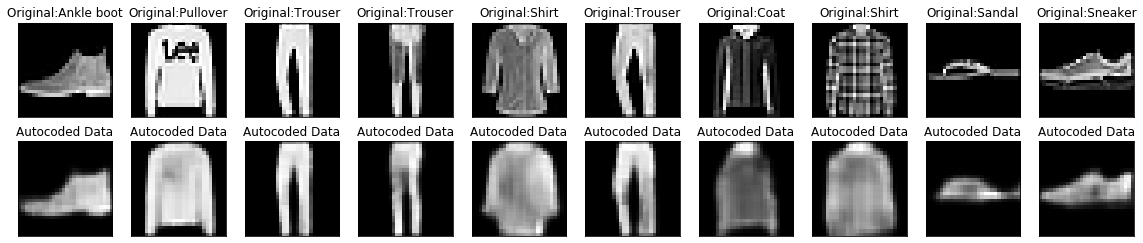

In [20]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    title = "Original:" + labelDic[y_test[i]]
    plt.title(title)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs[i].reshape(28, 28))
    plt.title("Autocoded Data")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

As we can see, the autoencoders reproduce the images from original testing data set. The result images are pretty similiar to rge original ones.

<H3>Image Classification</H3>
<br>This section contains two different deep convolutional neural networks for Fashion MNIST images clssification.</br>
<br>(1) Customized CNN Model:</br>
<ul>
<li>kernel sizes: 3x3 for 1st/2nd convolution and 2x2 for 3rd and 4th convolution layers</li>
<li>strides: defualt (1)</li>
<li>padding: same padding as input images</li>
<li>network depth: </li>
</ul>

In [33]:
# initialize the CNN model
model = Sequential()
image_shape = (28,28,1)

# 1st and 2nd convolution layers
model.add(Conv2D(filters=32,kernel_size=3, padding='same', activation='relu',input_shape = image_shape))
model.add(Conv2D(filters=32,kernel_size=3, padding='same', activation='relu'))

# 1st pooling layer 
# down sampling the output from 28*28 to 14*14
model.add(MaxPooling2D(pool_size=2))

# drop out 0.2 of nodes 
model.add(Dropout(0.2))

# 3rd and 4th convolution layers
model.add(Conv2D(filters=16,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=16,kernel_size=2, padding='same', activation='relu'))

# 2nd pooling later
# down sampling the output from 14*14 to 7*7
model.add(MaxPooling2D(pool_size=2))

# drop out 0.3 of nodes 
model.add(Dropout(0.3))

# 1st fully connected layer
# flatten out the layers
model.add(Flatten()) 
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 16)        1040      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 16)        

In [44]:
# Preparing training and validation set
# training: 48000, 28, 28 
# validate: 12000, 28, 28
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test/ 255.0
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [45]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [46]:
model_compile = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 33s 684us/step - loss: 1.0122 - accuracy: 0.6442 - val_loss: 0.5043 - val_accuracy: 0.8259
Epoch 2/50
48000/48000 [==============================] - 33s 698us/step - loss: 0.5190 - accuracy: 0.8120 - val_loss: 0.3962 - val_accuracy: 0.8635
Epoch 3/50
48000/48000 [==============================] - 34s 703us/step - loss: 0.4410 - accuracy: 0.8412 - val_loss: 0.3494 - val_accuracy: 0.8774
Epoch 4/50
48000/48000 [==============================] - 34s 699us/step - loss: 0.3979 - accuracy: 0.8580 - val_loss: 0.3270 - val_accuracy: 0.8858
Epoch 5/50
48000/48000 [==============================] - 33s 684us/step - loss: 0.3713 - accuracy: 0.8673 - val_loss: 0.3163 - val_accuracy: 0.8863
Epoch 6/50
48000/48000 [==============================] - 33s 682us/step - loss: 0.3499 - accuracy: 0.8735 - val_loss: 0.2829 - val_accuracy: 0.9023
Epoch 7/50
48000/48000 [==============================] 

In [50]:
# evaluate the result
score_train = model.evaluate(x_train,y_train,verbose=0)
score_test = model.evaluate(x_test,y_test,verbose=0)

loss_list = [score_train[0],score_test[0]]
acc_list = [score_train[1],score_test[1]]

result_df = pd.DataFrame({'Loss':loss_list, 'Accuracy':acc_list})

<H4>Result</H4>
<br>Below is the table that shows Loss and Accuracy of training and testing set for Fashion MNIST image classification, the training accuracy is slightly better than that of testing set, but not significant overfitting is observed.</br>

In [51]:
result_df.rename(index = {0: "Training Set", 1: "Testing Set"},inplace = True) 
result_df

,Loss,Accuracy
Training Set,0.135547,0.952417
Testing Set,0.206601,0.927000


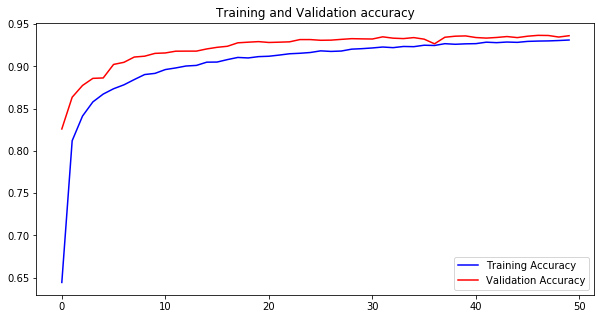

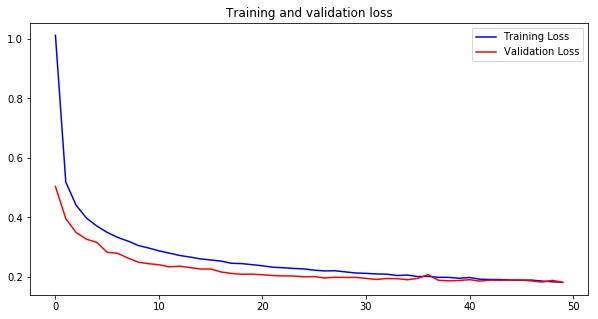

In [66]:
# visualize the change of accuracy and loss
plt.figure(figsize=(10,5))
accuracy = model_compile.history['accuracy']
val_accuracy = model_compile.history['val_accuracy']
loss = model_compile.history['loss']
val_loss = model_compile.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy',color = 'b')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy',color = 'r')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b', label='Training Loss', color = 'b')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',color = 'r')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As we can see, the validation accuracy is actually better than the training accuracy, meaning no overfitting happened. The overall accuracy and loss of testing set compared to training set are fair enough, as displayed above.

<br>(2) Transfer Learning CNN Model:</br>
<br>Use pre-trained VGG19 model, and change final dense layers mapping to 10 different labels for classification</br>

In [2]:
from tensorflow.keras.applications import VGG19
import cv2

In [3]:
# Preparing training and validation set
# training: 48000, 28, 28 
# validate: 12000, 28, 28
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
x_train = x_train.reshape((60000, 28, 28, 3))
x_test = x_test.reshape((10000, 28, 28, 3))
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test/ 255.0
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [4]:
# Image Resizing
# original image is shape (28, 28, 3)
# converted image is shape (32, 32, 3)
trainL = []
for i in range(x_train.shape[0]):
    res = cv2.resize(x_train[i], dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    trainL.append(res)
x_train = np.asarray(trainL)

testL = []
for i in range(x_test.shape[0]):
    res = cv2.resize(x_test[i], dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    testL.append(res)
x_test = np.asarray(testL)

valL = []
for i in range(x_validate.shape[0]):
    res = cv2.resize(x_validate[i], dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    valL.append(res)
x_validate = np.asarray(valL)

In [6]:
model = VGG19(include_top=False, input_shape=(32, 32, 3))
# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
    
# add new classifier layers
x = model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)

# summarize
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [7]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])

In [8]:
model_compile = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 451s 9ms/step - loss: 2.8242 - acc: 0.0857 - val_loss: 2.3899 - val_acc: 0.0943
Epoch 2/50
48000/48000 [==============================] - 451s 9ms/step - loss: 2.3649 - acc: 0.1385 - val_loss: 2.0353 - val_acc: 0.2471
Epoch 3/50
48000/48000 [==============================] - 453s 9ms/step - loss: 2.0532 - acc: 0.2416 - val_loss: 1.7813 - val_acc: 0.4606
Epoch 4/50
48000/48000 [==============================] - 457s 10ms/step - loss: 1.8178 - acc: 0.3581 - val_loss: 1.5869 - val_acc: 0.6027
Epoch 5/50
48000/48000 [==============================] - 462s 10ms/step - loss: 1.6390 - acc: 0.4539 - val_loss: 1.4356 - val_acc: 0.6594
Epoch 6/50
48000/48000 [==============================] - 451s 9ms/step - loss: 1.4950 - acc: 0.5262 - val_loss: 1.3164 - val_acc: 0.6848
Epoch 7/50
48000/48000 [==

In [15]:
# evaluate the result
score_train = model.evaluate(x_train,y_train,verbose=0)
score_test = model.evaluate(x_test,y_test,verbose=0)

loss_list = [score_train[0],score_test[0]]
acc_list = [score_train[1],score_test[1]]

result_df = pd.DataFrame({'Loss':loss_list, 'Accuracy':acc_list})

In [17]:
result_df.rename(index = {0: "Training Set", 1: "Testing Set"},inplace = True) 
result_df

,Loss,Accuracy
Training Set,0.603175,0.792583
Testing Set,0.615380,0.790900


<H4>Result</H4>
<br>Below is the table that shows Loss and Accuracy of training and testing set for Fashion MNIST image classification with pre-trained VGG19 model and few dense layers for classification, the overall accuracy is about 0.79 which is not bad but worse compared to customized CNN. The training and testing results are not differed a lot which means no sigifinicant overfitting is observed.</br>

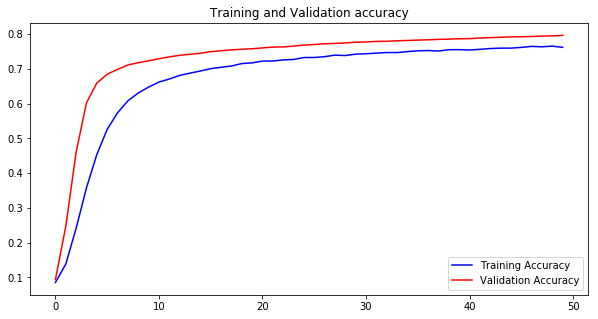

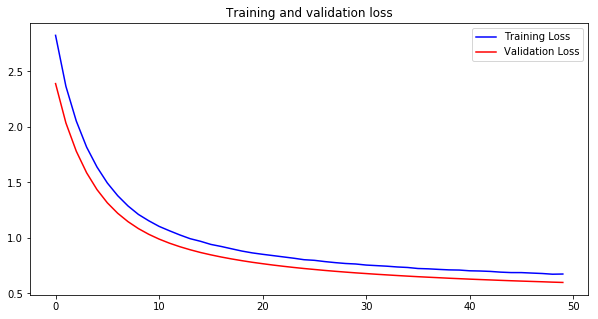

In [14]:
# visualize the change of accuracy and loss
plt.figure(figsize=(10,5))
accuracy = model_compile.history['acc']
val_accuracy = model_compile.history['val_acc']
loss = model_compile.history['loss']
val_loss = model_compile.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy',color = 'b')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy',color = 'r')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b', label='Training Loss', color = 'b')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',color = 'r')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<H4>Summary</H4>
<br>From the accuracy/loss results of customized deep convolution neural network and pre-trained VGG model for Fashion MNIST image classification, we can see the accuracy of customized neural network with all layers to be trainable is greater than that of the pre-trained model. (0.92 vs 0.79)</br>
<br>The primary reason I think is: VGG19 is trained on more than a million images from the ImageNet database with more than 1000 different colored (RGB channel) objects. And the default input size is 224 by 224. Whereas our data is amplified from 28 by 28 to 32 by 32 for the minimum requirement and stacked three channels for RGB requirement. The small size of Fashion MNIST images makes it hard to capture all details with deep and large kernels of pre-trained model.</br>

<H3>Text Classification</H3>
<br>This section explores how to use recurrent neural network to classify text data</br>
<br>Dataset: The dataset consists of tweets along with labels for which topics were being referenced in the tweet. Examples of the topics include "storms", "rain", "hurricane", "snow" and so on</br>
<br>The full list of labels is shown below:</br>

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Embedding, LSTM
import re

In [9]:
labelDic = {"k1":"clouds",
            "k2":"cold",
            "k3":"dry",
            "k4":"hot",
            "k5":"humid",
            "k6":"hurricane",
            "k7":"I can't tell",
            "k8":"ice",
            "k9":"other",
            "k10":"rain",
            "k11":"snow",
            "k12":"storms",
            "k13":"sun",
            "k14":"tornado",
            "k15":"wind"}

In [10]:
df = pd.read_csv('tweets_with_labels.csv',sep='\t',error_bad_lines=False)

In [11]:
df.head(10)

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.000
1,2,RT: @mention: I love rainy days.,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.000
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.000,0.000,0.000,0.000,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.000,0.000,0.000,0.000,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.000
4,9,@mention good morning sunshine,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.000
5,10,Rather be storm chasing.,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,1.0,0.000,0.0,0.000
6,11,#WEATHER: 1:54 pm : 61.0F. Feels 60F. 29.98% ...,0.0,0.203,0.176,0.000,0.376,0.0,0.421,0.0,0.176,0.0,0.0,0.0,0.000,0.0,0.579
7,13,Father. Son. Holy ghost. Amen... hope I come o...,0.0,0.000,0.000,1.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000
8,14,Mild Monday best weather day of the week in Ok...,0.0,0.000,0.000,0.194,0.000,0.0,0.605,0.0,0.200,0.0,0.0,0.0,0.000,0.0,0.000
9,15,"With the snow forecast for Tahoe this weekend,...",0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,1.0,0.0,0.000,0.0,0.000


<h3>Data Clean-up</h3>

In [12]:
# get labels for our dataset
df_labels = df[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9','k10', 'k11', 'k12', 'k13', 'k14', 'k15']]

# preprocessing function
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

# preprocessing
corpus = list(df["tweet"])
X = [preprocess_text(sen) for sen in corpus]
y = df_labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# tokenizer and convert to input
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
# Max number of words
max_features = 10000

max_len = 64

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [13]:
# splitting training and testing sets by 9:1
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70151, 250) (70151, 15)
(7795, 250) (7795, 15)


<H3>Set up Recurrent Neural Network</H3>

In [14]:
class TextLSTM():
    def __init__(self,max_len,max_features):
        self.max_len = max_len
        self.max_features = max_features
        self.model = self.build_model()

    def build_model(self):
        input_sen = Input(shape=(self.max_len,))
        x = Embedding(self.max_features, 32)(input_sen)
        x = LSTM(32)(x)
        output = Dense(15, activation='sigmoid')(x)
        return Model(input_sen,output)

    def fit(self,x_train,y_train,x_test,y_test):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()
        res = self.model.fit(x_train, y_train,
                       epochs=20,
                       batch_size=64,
                       shuffle=True,
                       validation_data=(x_test, y_test))
        return res

In [15]:
TL = TextLSTM(max_len,max_features)
history_LSTM = TL.fit(X_train,y_train,X_test,y_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 64, 32)            320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
Total params: 328,815
Trainable params: 328,815
Non-trainable params: 0
_________________________________________________________________


/Users/byw/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 54562 samples, validate on 23384 samples
Epoch 1/20
54562/54562 [==============================] - 23s 431us/step - loss: 2.7082 - accuracy: 0.2854 - val_loss: 2.6775 - val_accuracy: 0.2875
Epoch 2/20
54562/54562 [==============================] - 23s 430us/step - loss: 2.6862 - accuracy: 0.2882 - val_loss: 2.6777 - val_accuracy: 0.2875
Epoch 3/20
54562/54562 [==============================] - 24s 435us/step - loss: 2.6859 - accuracy: 0.2882 - val_loss: 2.6790 - val_accuracy: 0.2875
Epoch 4/20
54562/54562 [==============================] - 24s 434us/step - loss: 2.6860 - accuracy: 0.2882 - val_loss: 2.6775 - val_accuracy: 0.2875
Epoch 5/20
54562/54562 [==============================] - 23s 425us/step - loss: 2.6181 - accuracy: 0.3144 - val_loss: 2.5836 - val_accuracy: 0.3012
Epoch 6/20
54562/54562 [==============================] - 23s 427us/step - loss: 2.5827 - accuracy: 0.2984 - val_loss: 2.5761 - val_accuracy: 0.3005
Epoch 7/20
54562/54562 [==============================] 

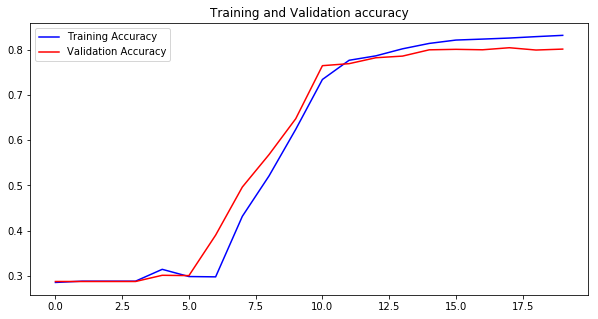

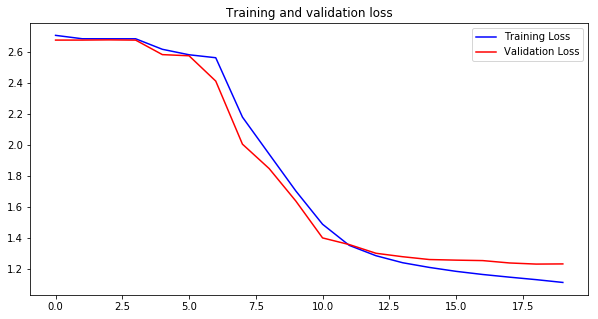

In [18]:
# visualize the change of accuracy and loss
plt.figure(figsize=(10,5))
accuracy = history_LSTM.history['accuracy']
val_accuracy = history_LSTM.history['val_accuracy']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy',color = 'b')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy',color = 'r')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b', label='Training Loss', color = 'b')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',color = 'r')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<H3>Text Classification with Convolutionary Neural Network</H3>

In [22]:
#set up the model
class TextCNN():
    def __init__(self,max_len,max_features):
        self.max_len = max_len
        self.max_features = max_features
        self.model = self.build_model()

    def build_model(self):
        input_sen = Input(shape=(self.max_len,))
        x = Embedding(self.max_features, 32)(input_sen)
        x = Conv1D(64,3,padding='same',activation='relu',strides=1)(x)
        x = GlobalMaxPooling1D()(x)
        x = Dense(150,activation="relu")(x)
        output = Dense(15, activation='sigmoid')(x)
        return Model(input_sen,output)

    def fit(self,x_train,y_train,x_test,y_test):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()
        res = self.model.fit(x_train, y_train,
                       epochs=5,
                       batch_size=64,
                       shuffle=True,
                       validation_data=(x_test, y_test))
        return res

In [23]:
# fit the model
TC = TextCNN(max_len,max_features)
history_CNN = TC.fit(X_train,y_train,X_test,y_test)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 64, 32)            320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 64)            6208      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               9750      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                2265      
Total params: 338,223
Trainable params: 338,223
Non-trainable params: 0
_____________________________________________________

/Users/byw/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 54562 samples, validate on 23384 samples
Epoch 1/5
54562/54562 [==============================] - 6s 114us/step - loss: 1.5506 - accuracy: 0.6798 - val_loss: 1.1534 - val_accuracy: 0.8192
Epoch 2/5
54562/54562 [==============================] - 6s 111us/step - loss: 1.1042 - accuracy: 0.8219 - val_loss: 1.1088 - val_accuracy: 0.8173
Epoch 3/5
54562/54562 [==============================] - 6s 113us/step - loss: 1.0470 - accuracy: 0.8301 - val_loss: 1.0912 - val_accuracy: 0.8250
Epoch 4/5
54562/54562 [==============================] - 6s 113us/step - loss: 1.0058 - accuracy: 0.8408 - val_loss: 1.0878 - val_accuracy: 0.8248
Epoch 5/5
54562/54562 [==============================] - 6s 110us/step - loss: 0.9715 - accuracy: 0.8498 - val_loss: 1.0971 - val_accuracy: 0.8255


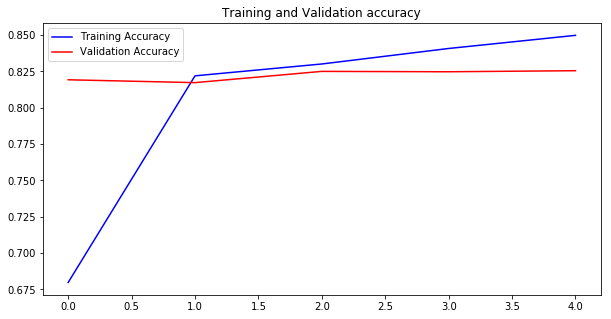

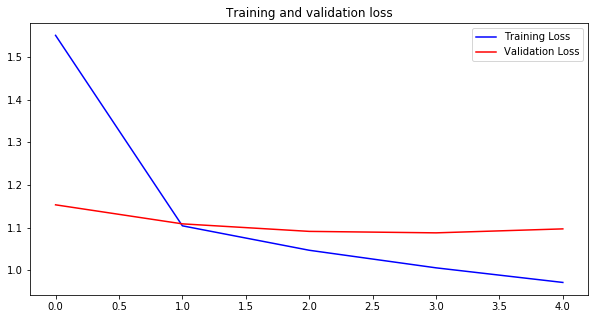

In [24]:
# visualize the change of accuracy and loss
plt.figure(figsize=(10,5))
accuracy = history_CNN.history['accuracy']
val_accuracy = history_CNN.history['val_accuracy']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy',color = 'b')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy',color = 'r')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b', label='Training Loss', color = 'b')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',color = 'r')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<H3>Compare Results from RNN and CNN</H3>

In [29]:
from sklearn.metrics import roc_curve, auc

In [30]:
# make prediction
TL_pred = TL.model.predict(X_test)
TC_pred = TC.model.predict(X_test)

In [31]:
#ROC curve for prdiction on class k1 to k15
def plot_roc(test_TL,test_TC,test_target,i):
    fprl, tprl, _ = roc_curve(test_target,test_TL)
    fprc, tprc,_ = roc_curve(test_target,test_TC)
    plt.figure()
    lw = 0.5
    plt.plot(fprl, tprl, color='blue',
             lw=lw, label='ROC curve for LSTM (area = %0.2f)' % auc(fprl,tprl))
    plt.plot(fprc, tprc, color='red',
             lw=lw, label='ROC curve for CNN (area = %0.2f)' % auc(fprc,tprc))
    plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for label k%s' % str(i+1))
    plt.legend(loc="lower right")
    plt.show()

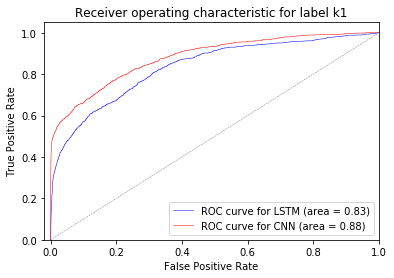

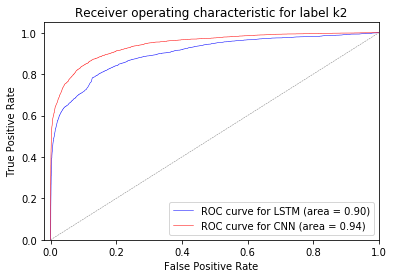

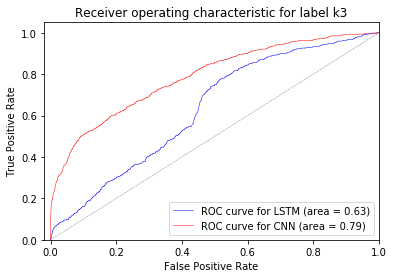

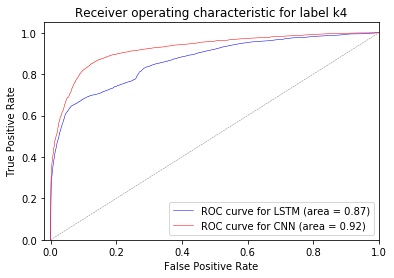

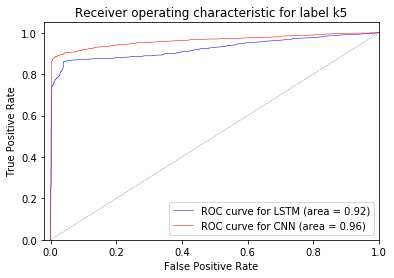

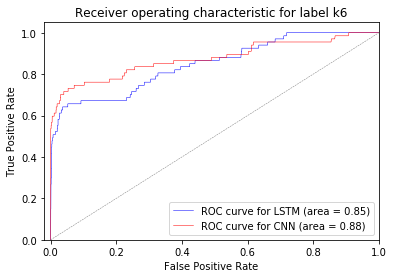

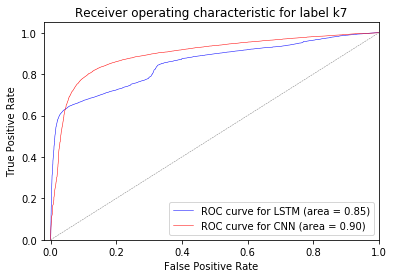

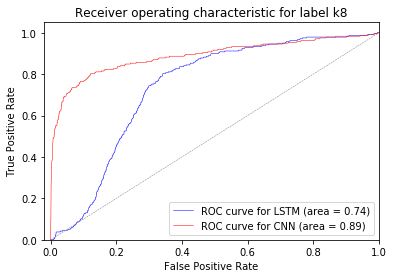

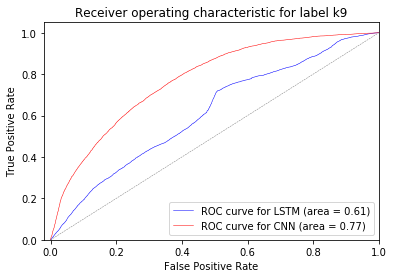

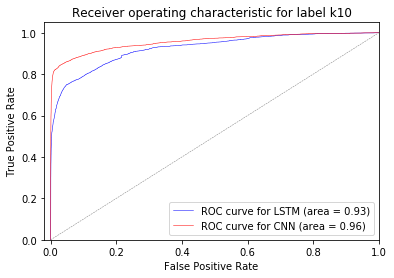

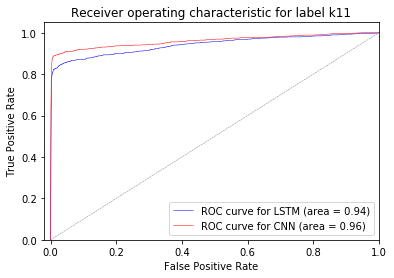

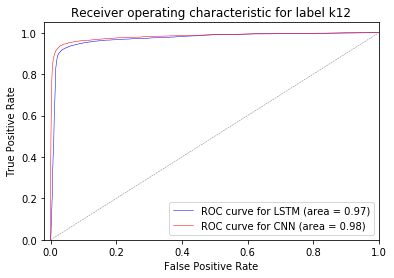

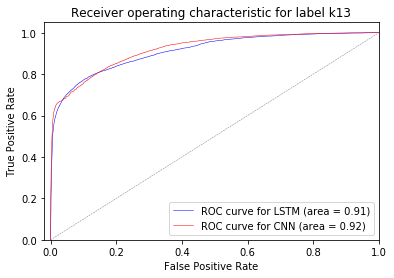

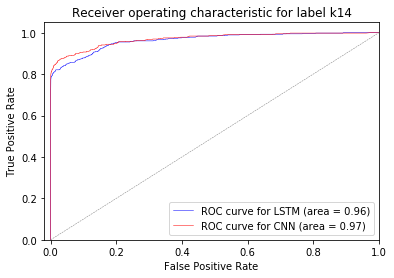

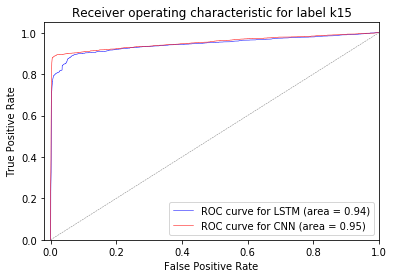

In [32]:
for i in range(15):
    test_TL = TL_pred[:,i]
    test_TC = TC_pred[:,i]
    test_target = y_test[:,i]>0
    plot_roc(test_TL,test_TC,test_target,i)

From the results above, we can see it takes longer to train a RNN model for text classification than a CNN model. And predition accuracy in term of CNN is generally lower than that of RNN model (by the AUC)